# Peer-graded Assignment: Описательный анализ данных

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Вы можете скачайть эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh).
## Инструкции

1\. Загрузим данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')



path='/Users/nikli/Documents/git_reps/Data/'
train_data = pd.read_csv(path+'orange_small_churn_data.txt')
train_labels = pd.read_csv(path+'orange_small_churn_labels.txt',names = ['Labels'])
train_data['Labels']=train_labels['Labels']
train_data.head(3)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Labels
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1


### Посмотрим на типы признаков

In [4]:
print(train_data.dtypes.value_counts())

float64    191
object      38
int64        2
dtype: int64


In [7]:
sina_data=train_data.isna().sum()
print( 'всего у нас ',len(sina_data[(sina_data.values == 0)].index) ,'признаков , в которых утсутствуют пропуски!')

всего у нас  20 признаков , в которых утсутствуют пропуски!


In [8]:
print('Посмотрим на эти признаки:')
sina_data[(sina_data.values == 0)].index

Посмотрим на эти признаки:


Index(['Var57', 'Var73', 'Var113', 'Var193', 'Var195', 'Var196', 'Var198',
       'Var204', 'Var207', 'Var210', 'Var211', 'Var212', 'Var216', 'Var220',
       'Var221', 'Var222', 'Var226', 'Var227', 'Var228', 'Labels'],
      dtype='object')

2\. Рассчитаем доли классов `отток` и `не отток`.

In [10]:
print('Churn describe')
display(train_data.loc[:,'Var1':'Var191'][train_data['Labels']==1].describe())
print('No churn describe')
display(train_data.loc[:,'Var1':'Var191'][train_data['Labels']==-1].describe())

print('доли классов отток и не отток. \n', train_labels['Labels'].value_counts(normalize = True) )

Churn describe


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
count,35.000000,41.0,41.000000,55.000000,5.600000e+01,2759.000000,2745.000000,0.0,35.000000,5.600000e+01,...,2789.000000,5.500000e+01,41.000000,41.000000,0.0,35.000000,35.000000,41.000000,1268.000000,17.000000
mean,12.571429,0.0,268.390244,0.163636,1.853238e+05,1130.382022,5.217486,NaN,53.085714,4.782121e+05,...,0.629975,1.342472e+06,94627.219512,10.048780,NaN,3.085714,18.571429,217.478049,233.422713,17753.648824
std,23.144413,0.0,1346.643677,1.213560,5.360181e+05,2511.307353,5.658438,NaN,75.056595,1.107214e+06,...,2.523785,1.970501e+06,160642.266806,15.520875,NaN,6.065192,40.678283,125.713221,83.635968,18839.953426
min,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,6.000000,172.980000
25%,0.000000,0.0,0.000000,0.000000,0.000000e+00,343.000000,0.000000,NaN,7.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,2.000000,143.340000,162.000000,2503.080000
50%,8.000000,0.0,0.000000,0.000000,0.000000e+00,791.000000,7.000000,NaN,34.000000,0.000000e+00,...,0.000000,3.905040e+05,0.000000,0.000000,NaN,0.000000,6.000000,241.140000,222.000000,8615.250000
75%,16.000000,0.0,102.000000,0.000000,8.546500e+04,1232.000000,7.000000,NaN,55.000000,2.361578e+05,...,0.000000,1.998330e+06,137438.000000,16.000000,NaN,6.000000,14.000000,277.800000,288.000000,34518.690000
max,128.000000,0.0,8655.000000,9.000000,3.024000e+06,105035.000000,35.000000,NaN,360.000000,5.443200e+06,...,28.000000,6.744000e+06,729532.000000,56.000000,NaN,30.000000,224.000000,628.620000,642.000000,52506.720000


No churn describe


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
count,535.000000,965.000000,964.000000,1220.000000,1.109000e+03,32806.000000,32815.000000,0.0,535.000000,1.109000e+03,...,33195.000000,1.220000e+03,9.650000e+02,965.000000,0.0,535.000000,535.000000,965.000000,15517.000000,249.000000
mean,10.900935,0.005181,436.173237,0.147541,2.522737e+05,1335.855240,6.923846,NaN,47.121495,3.764552e+05,...,0.609007,1.404086e+06,8.008385e+04,7.307772,NaN,3.543925,15.891589,162.883275,273.622350,22970.571361
std,35.601881,0.160956,4556.193744,1.404155,6.825552e+05,2617.494085,6.319380,NaN,150.690540,9.261294e+05,...,2.489590,2.282483e+06,2.161897e+05,35.225439,NaN,9.594076,55.797616,112.379585,86.268914,31494.050553
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,-6.420000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,532.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,19.380000,210.000000,2395.980000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000,1.015830e+05,0.000000e+00,0.000000,NaN,0.000000,4.000000,193.980000,270.000000,12668.940000
75%,16.000000,0.000000,0.000000,0.000000,1.207850e+05,1449.000000,7.000000,NaN,45.000000,2.419740e+05,...,0.000000,1.805244e+06,3.883200e+04,8.000000,NaN,6.000000,14.000000,247.680000,330.000000,31184.100000
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,49.000000,1.199478e+07,3.048400e+06,1000.000000,NaN,102.000000,910.000000,524.640000,642.000000,230427.000000


доли классов отток и не отток. 
 -1    0.9256
 1    0.0744
Name: Labels, dtype: float64


In [31]:
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
categorical_ = list(set(cols) - set(num_cols))

3\. Рассчитаем корреляции переменных с целевой функцией и проанализируем полученные данные.

Обратим внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. 

In [34]:
train_data.loc[:,'Var1':'Var191'].corrwith(train_labels['Labels'],axis = 0).abs().dropna().sort_values()[-10:]

Var177    0.060160
Var73     0.069550
Var7      0.072437
Var19     0.074202
Var111    0.076956
Var53     0.079045
Var188    0.095238
Var131    0.096202
Var189    0.122501
Var168    0.135305
dtype: float64

4\. Визуализируем данные: рассмотрим топ 10 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных построем:
* Распределения в разрезе классов
* Отобразим объекты в координатах пар признаков

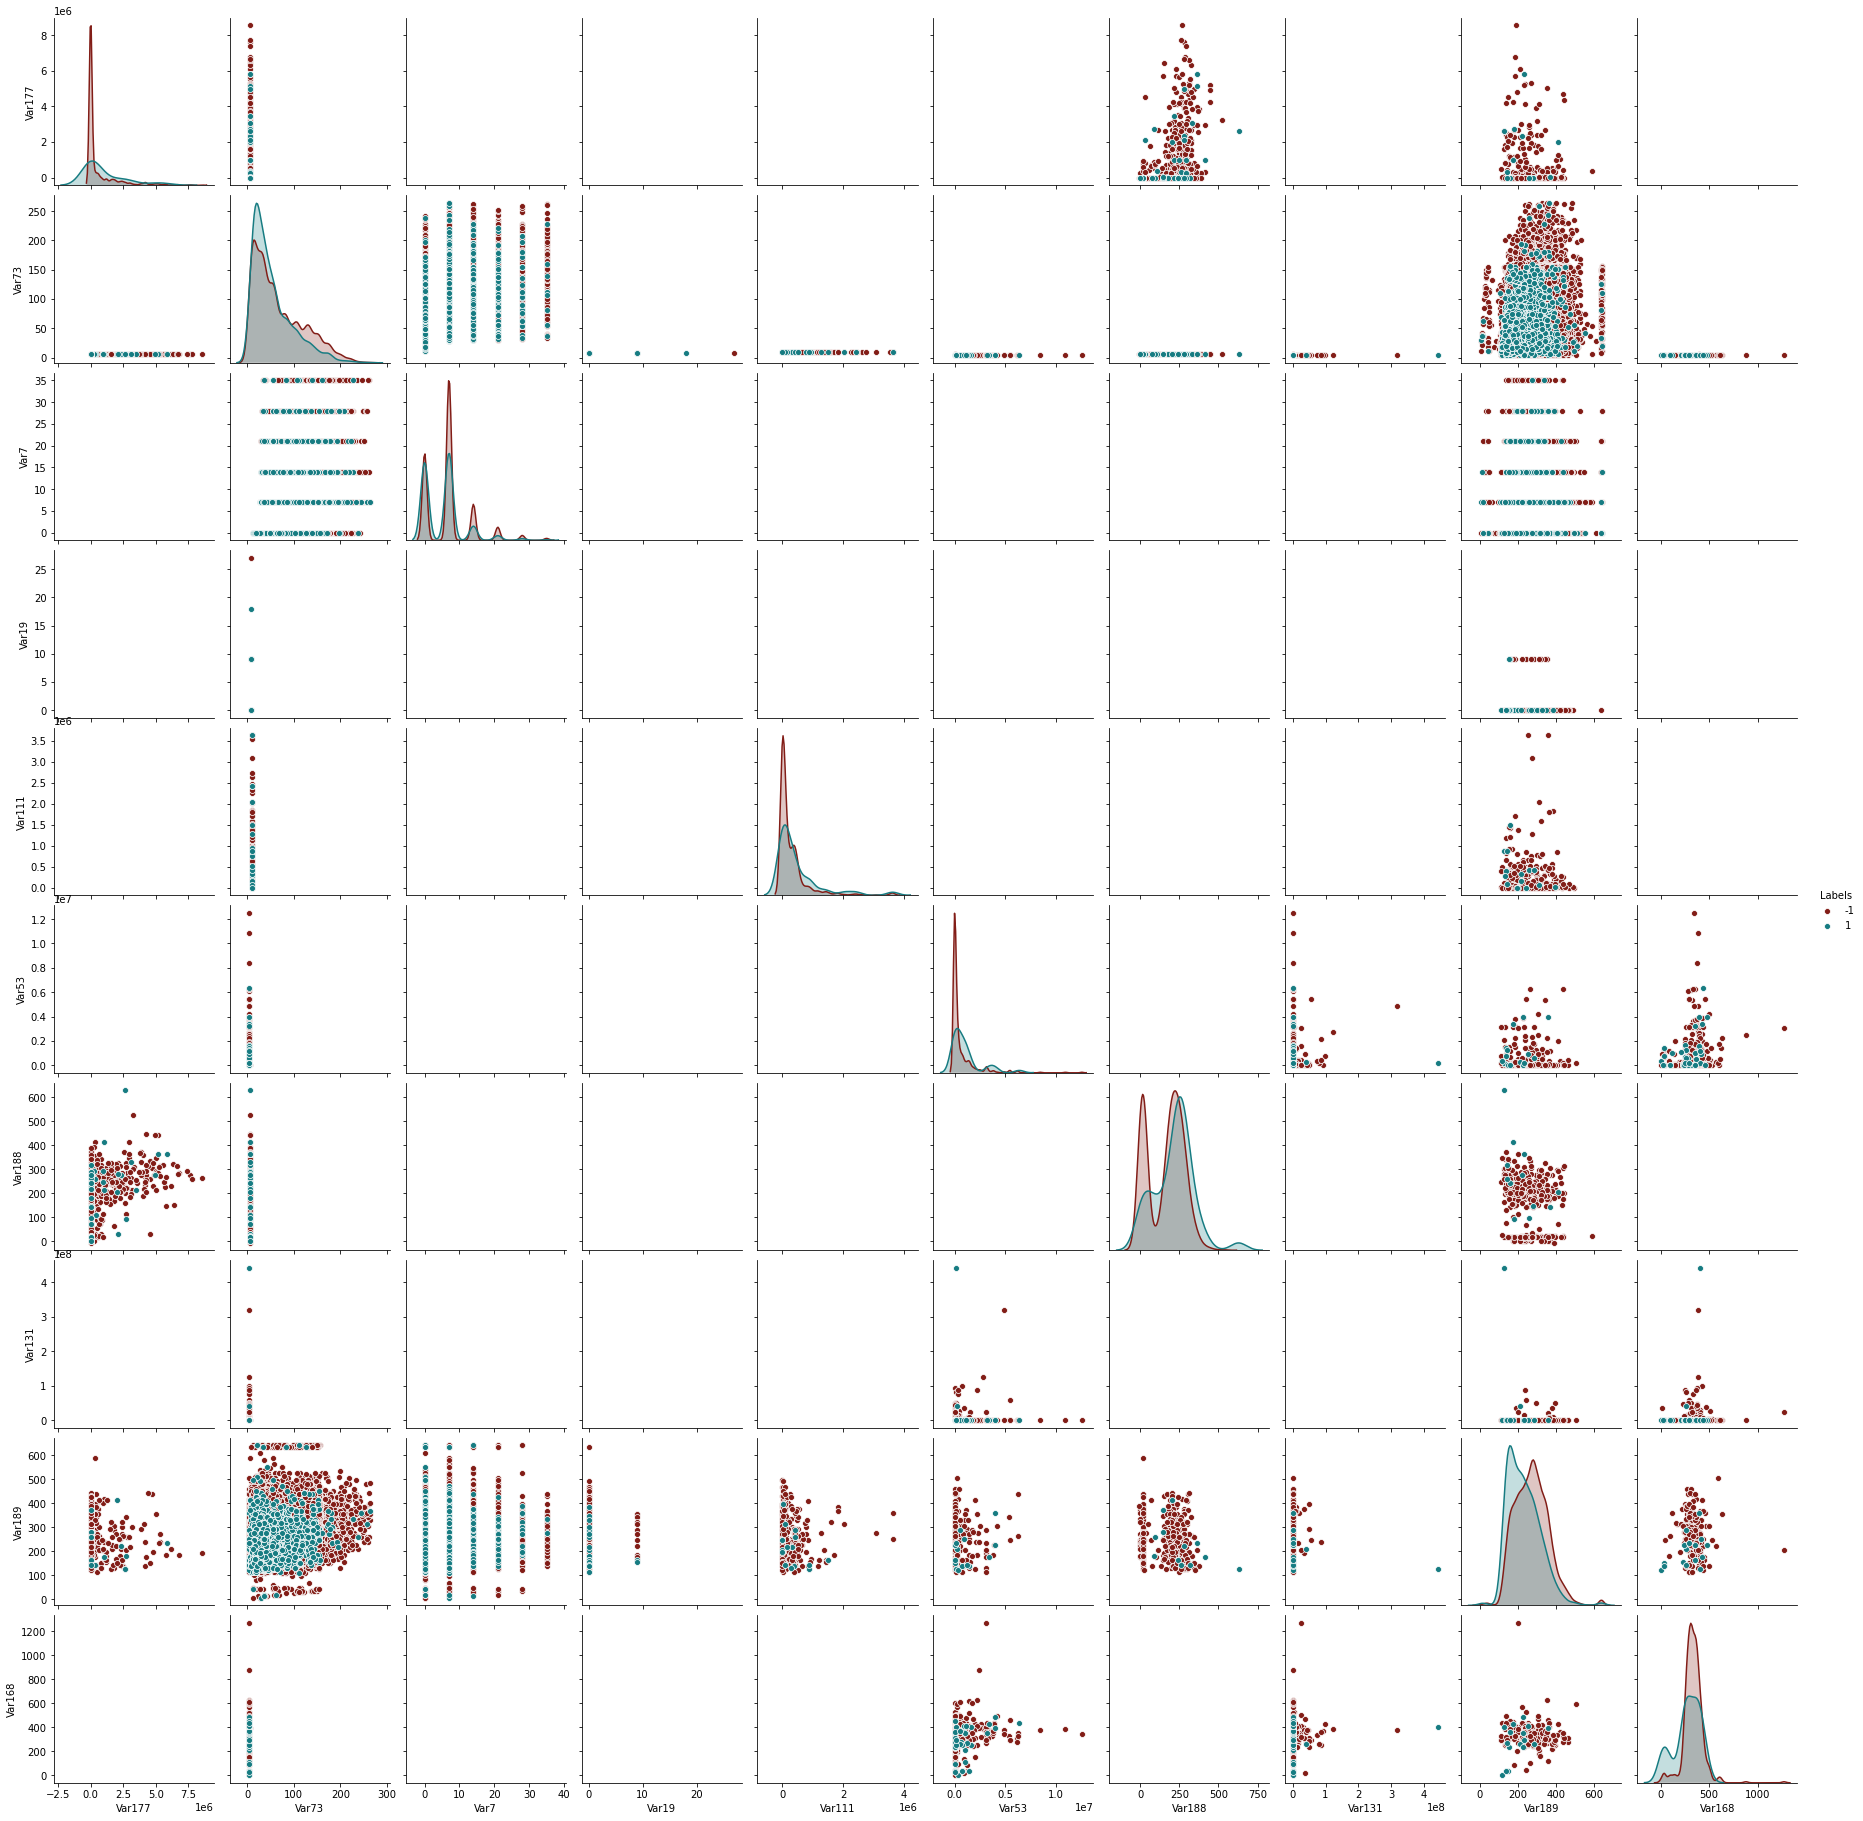

In [15]:
top_10_variables = train_data.loc[:,'Var1':'Var191'].corrwith(train_labels['Labels'],axis = 0).abs().dropna().sort_values()[-10:].index
new_array=['Labels']
top_10_variables = np.append(top_10_variables, new_array)
sns.pairplot(train_data[top_10_variables], hue='Labels',palette = sns.hls_palette(2, l=.3, s=.7));

Распределения Var177, Var188, Var53, Var7, Var189, Var168 могут быть информативными и способны разделять объекты на классы. 

Ещё раз отдельно отобразим объекты в координатах пар признаков для наглядности


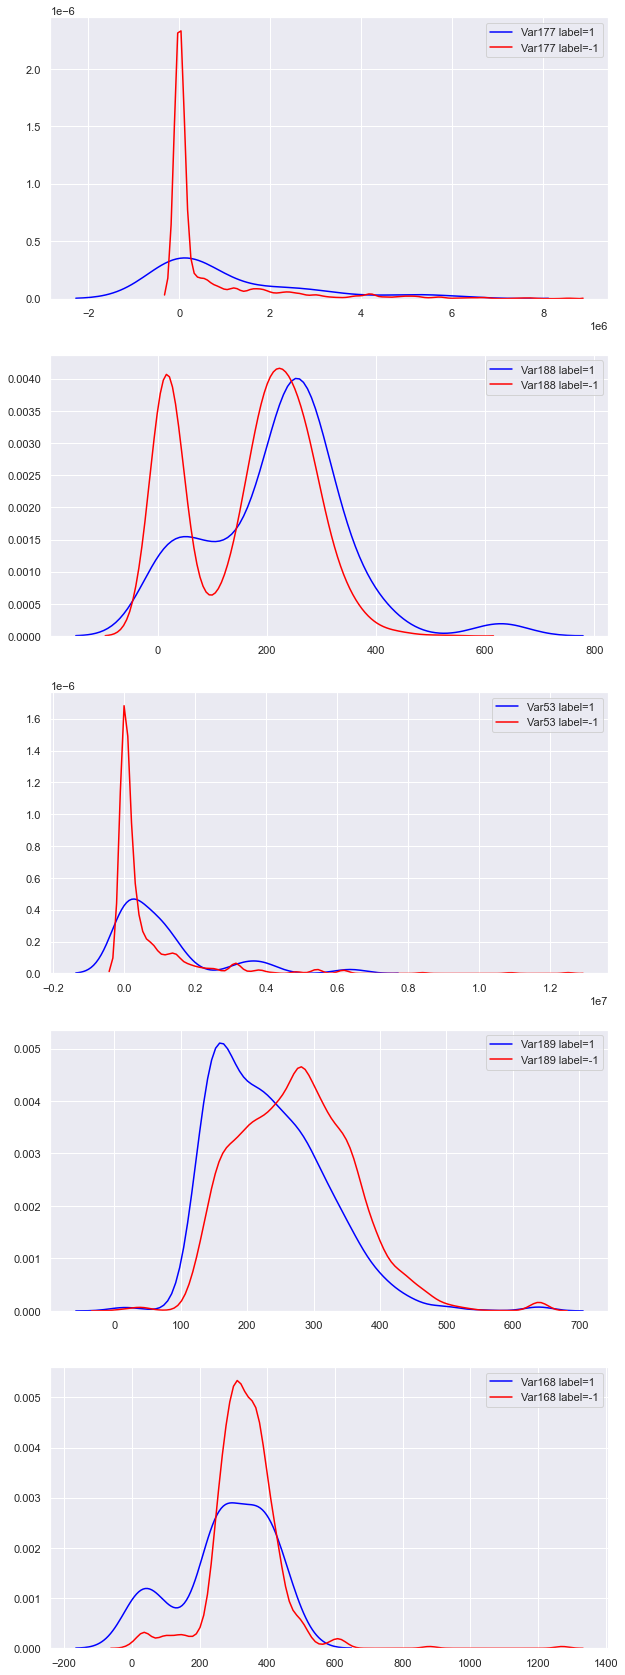

In [20]:
informative_var=['Var177','Var188','Var53','Var189','Var168']
fig, axs=plt.subplots(5, figsize=(10, 30))
sns.set(color_codes=True)
for ax, informative_var in zip(axs, informative_var):
    sns.kdeplot(train_data[informative_var][train_data['Labels'] == 1], ax=ax, color='blue', label=str(informative_var)+" label=1")
    sns.kdeplot(train_data[informative_var][train_data['Labels'] == -1], ax=ax, color='red', label=str(informative_var)+" label=-1")

5\. Проделаем аналогичные шаги для случайно выбранных 10 числовых признаков.

In [22]:
def analyze_cols(num_params, array_cols, train_data):
    print(train_data[array_cols].corrwith(train_labels['Labels'],axis = 0).abs().dropna()[-num_params:])
    array_cols.append("Labels")
    
    
    top_n_variables = train_data[array_cols].corrwith(train_labels['Labels'],axis = 0).abs().dropna()[-num_params:].index
    
    sns.pairplot(train_data[top_n_variables], hue='Labels',palette = sns.hls_palette(2, l=.3, s=.7));
    
    
    fig, axs=plt.subplots(num_params, figsize=(20, 60))

    sns.set(color_codes=True)
    for ax, columns in zip(axs, top_n_variables):
        sns.kdeplot(train_data[columns][train_data['Labels'] == 1], ax=ax, color='blue', label=str(columns)+" label=1")
        sns.kdeplot(train_data[columns][train_data['Labels'] == -1], ax=ax, color='red', label=str(columns)+" label=-1")

Var112    0.005653
Var122    0.024683
Var102    0.007383
Var12     0.040963
Var22     0.007720
Var113    0.056114
Var123    0.000115
Var103    0.009261
Var13     0.048378
Var24     0.010794
dtype: float64


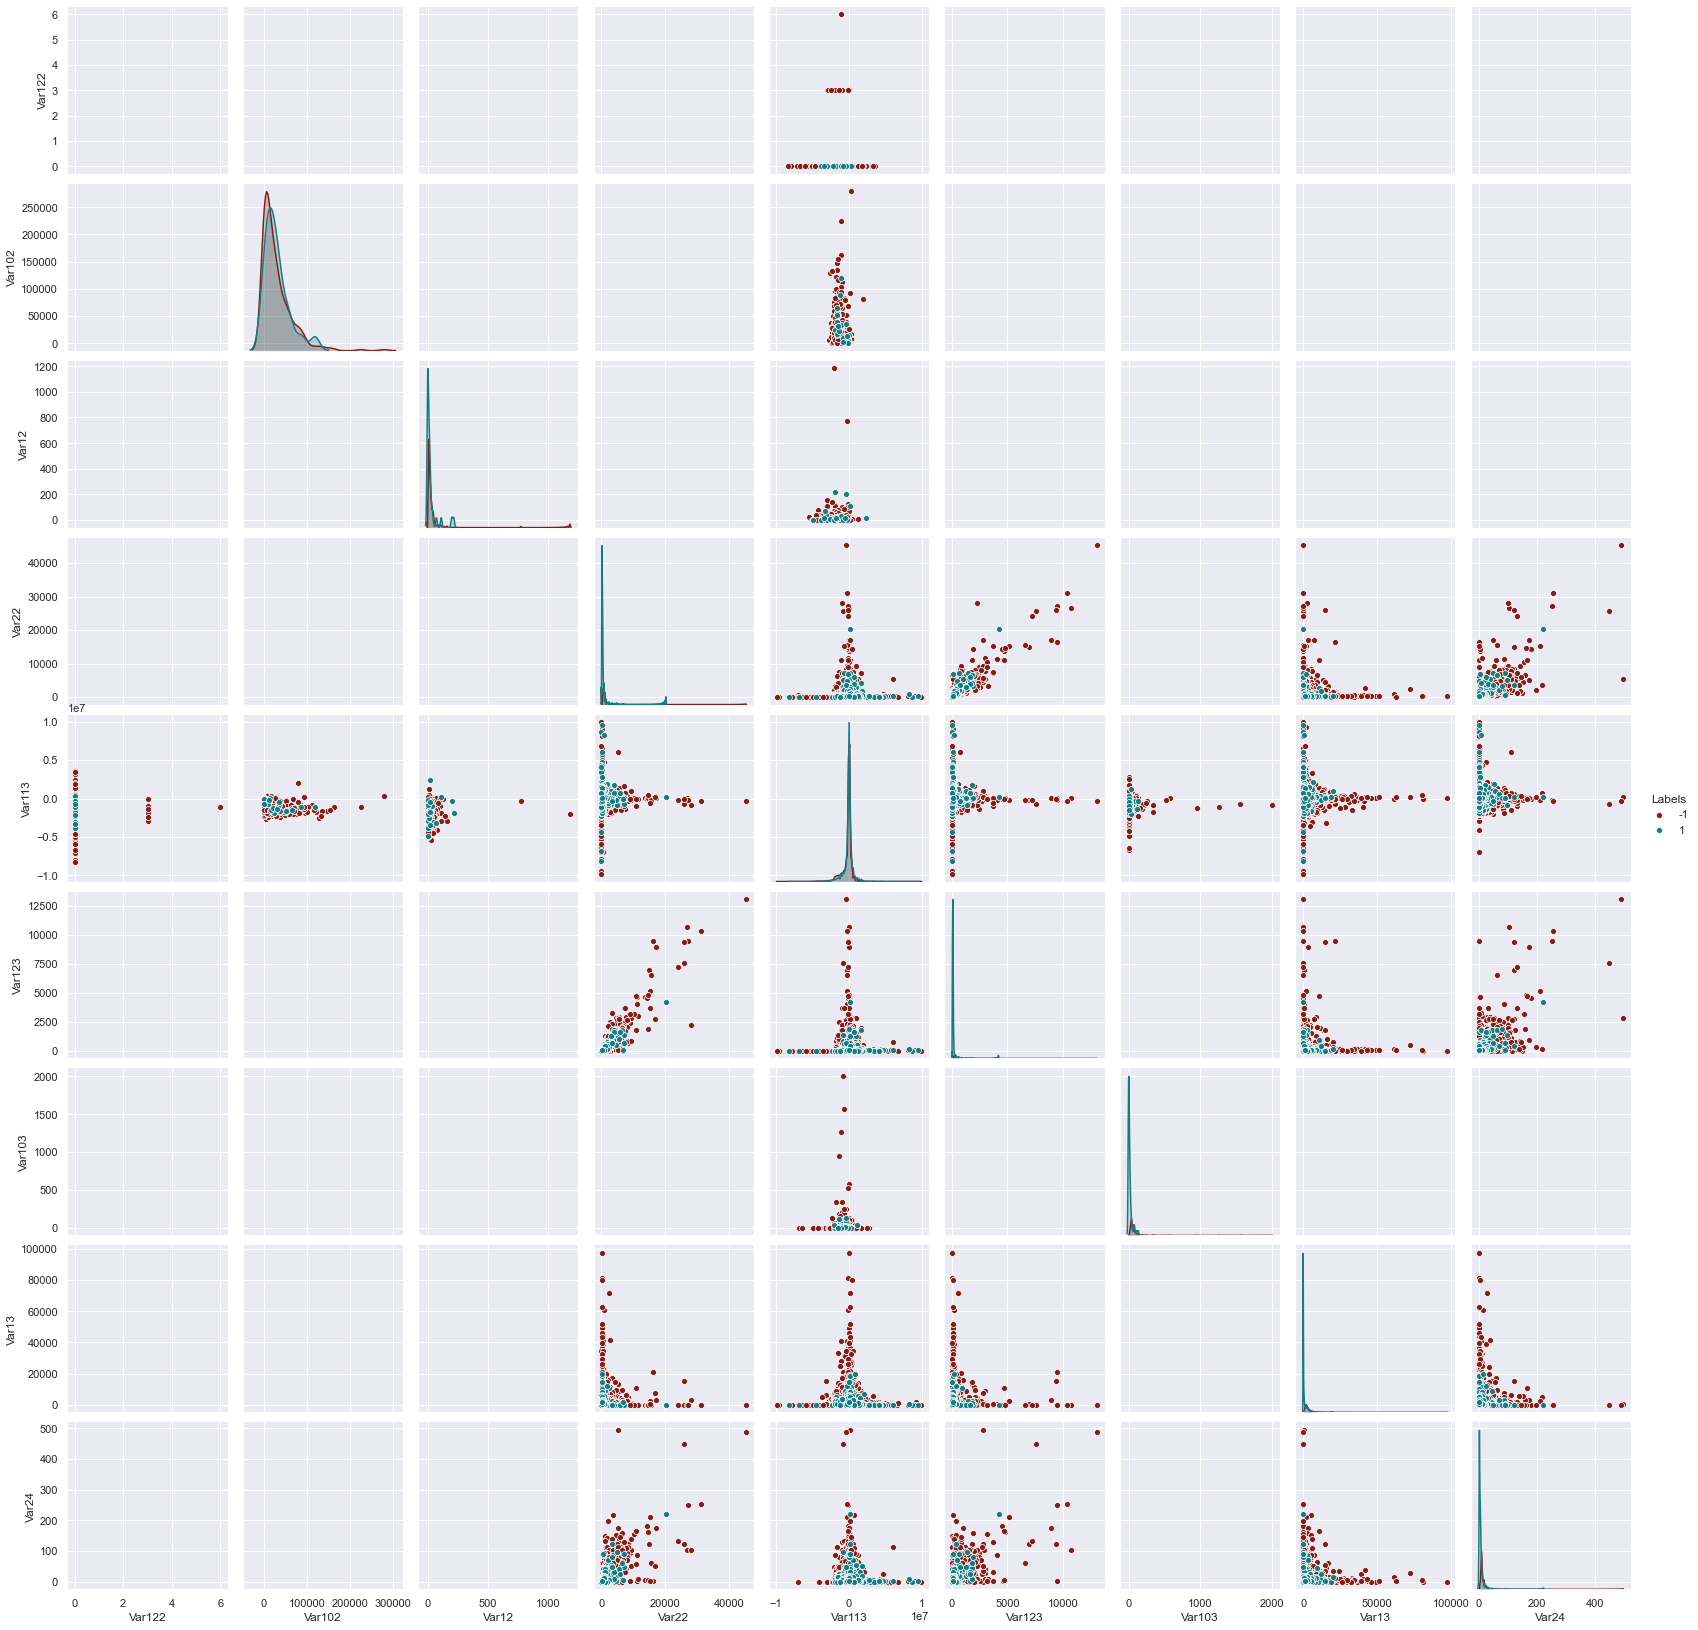

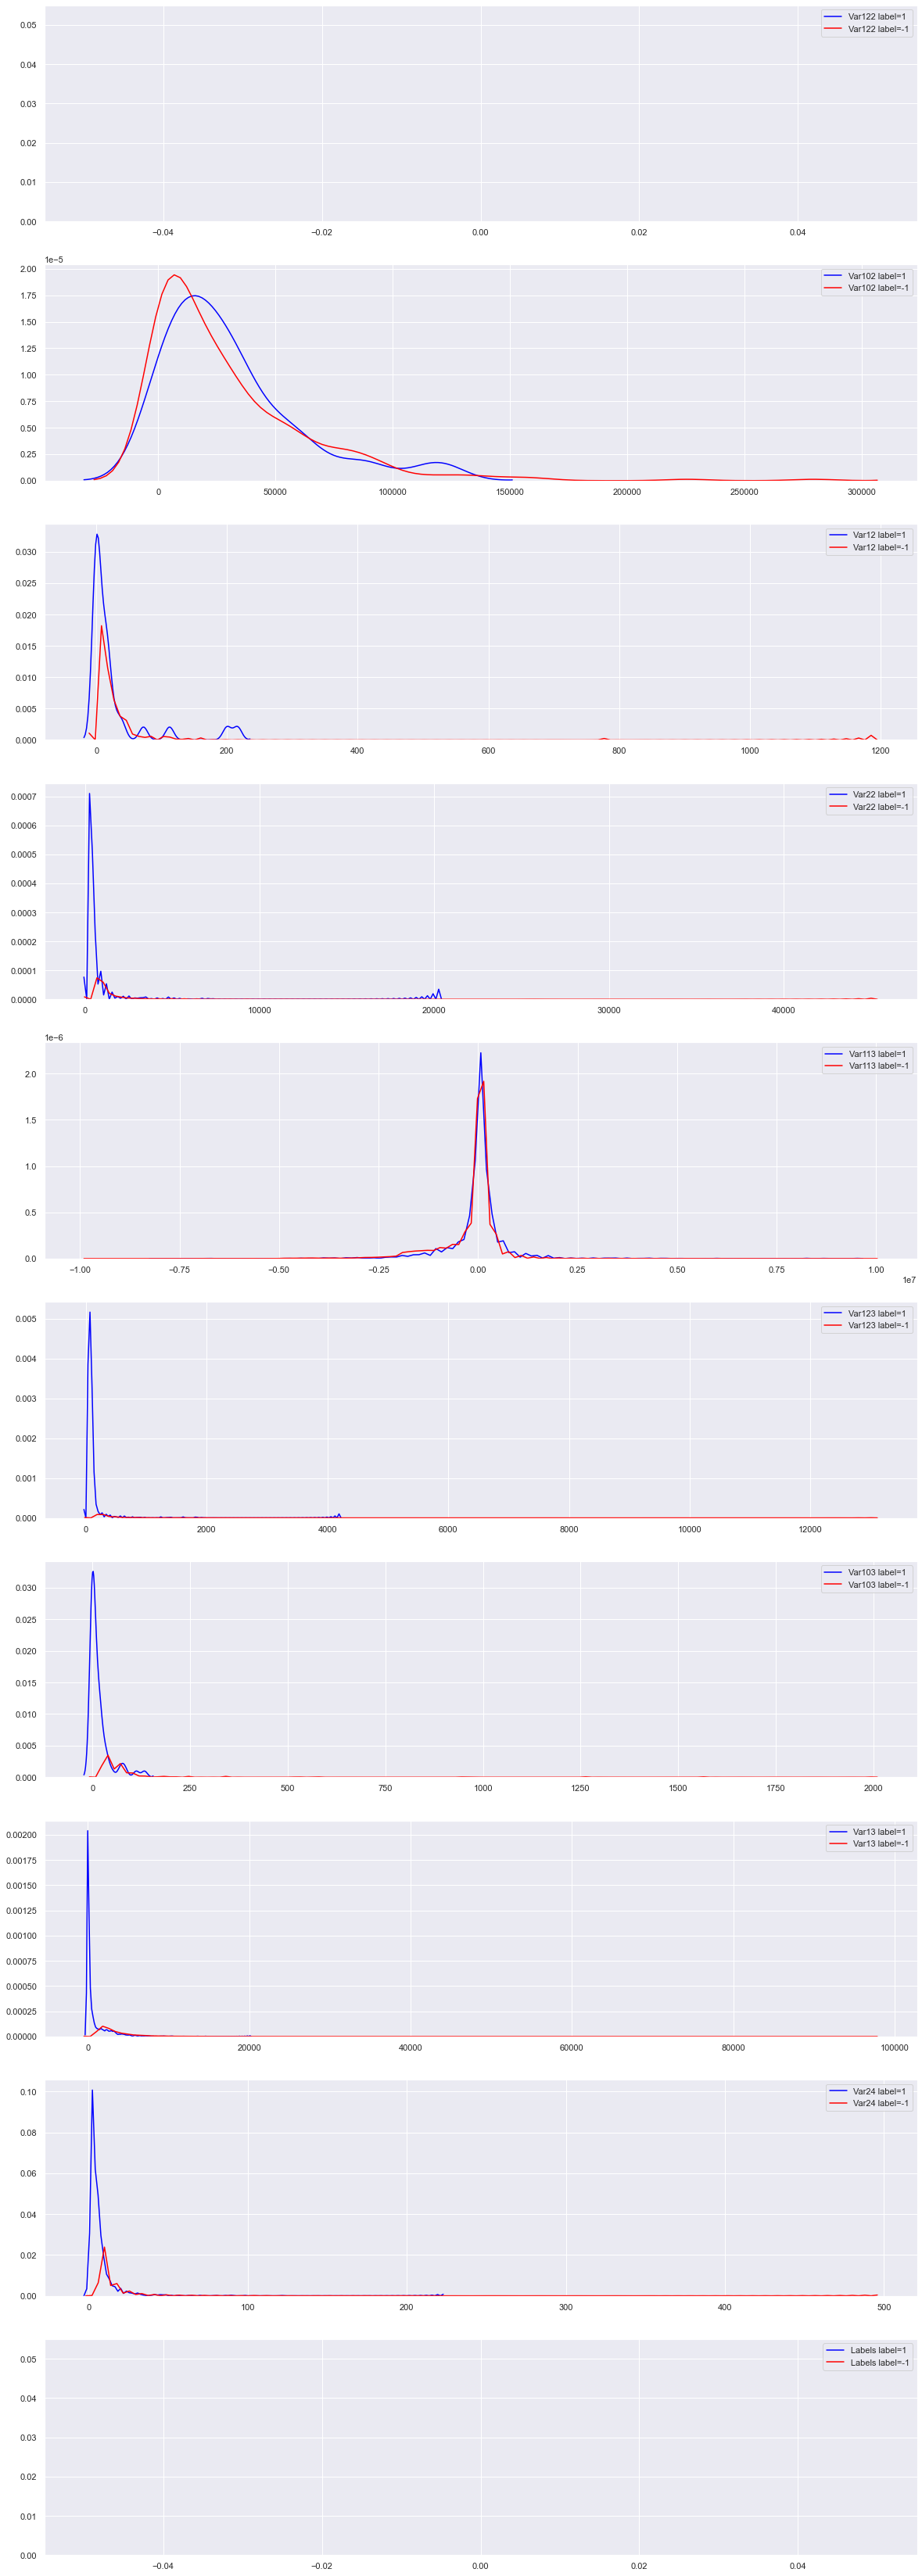

In [23]:
analyze_cols(num_params=10, array_cols=['Var112','Var122','Var102','Var12','Var22',
                                               'Var113','Var123','Var103','Var13','Var24'], train_data=train_data)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [82]:
top_10_usless_= train_data.corrwith(train_labels['Labels'],axis = 0).abs().sort_values().dropna()[:10].index
top_10_usless_

Index(['Var123', 'Var129', 'Var44', 'Var104', 'Var105', 'Var146', 'Var133',
       'Var16', 'Var181', 'Var4'],
      dtype='object')

Var10     0.023282
Var30     0.013139
Var40     0.010414
Var50     0.035188
Var60     0.012293
Var70     0.009312
Var80     0.018527
Var95     0.004567
Var105    0.000711
dtype: float64


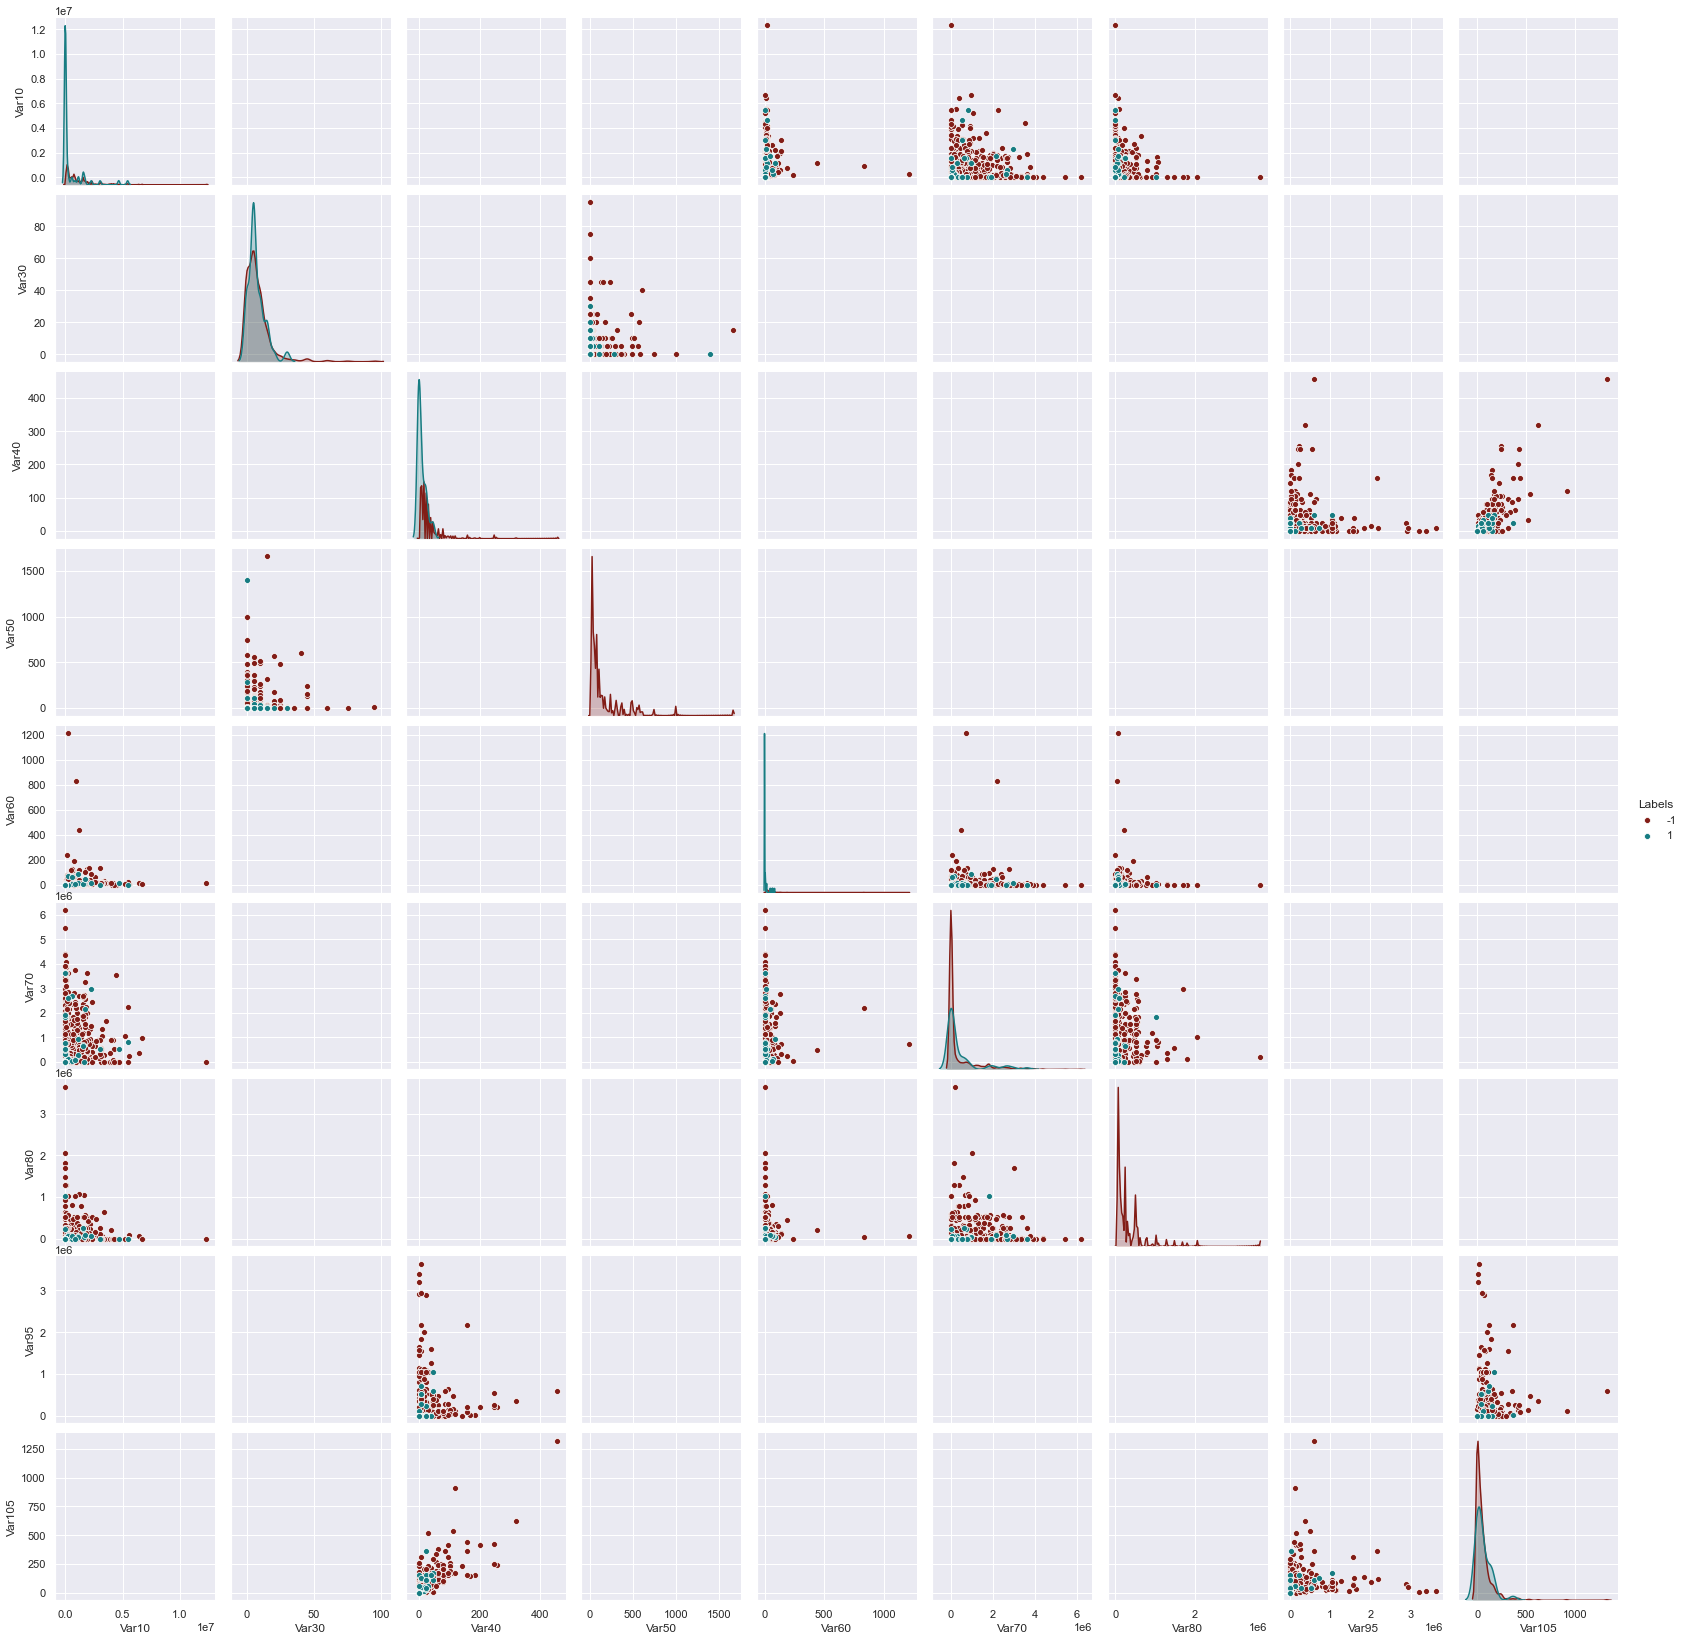

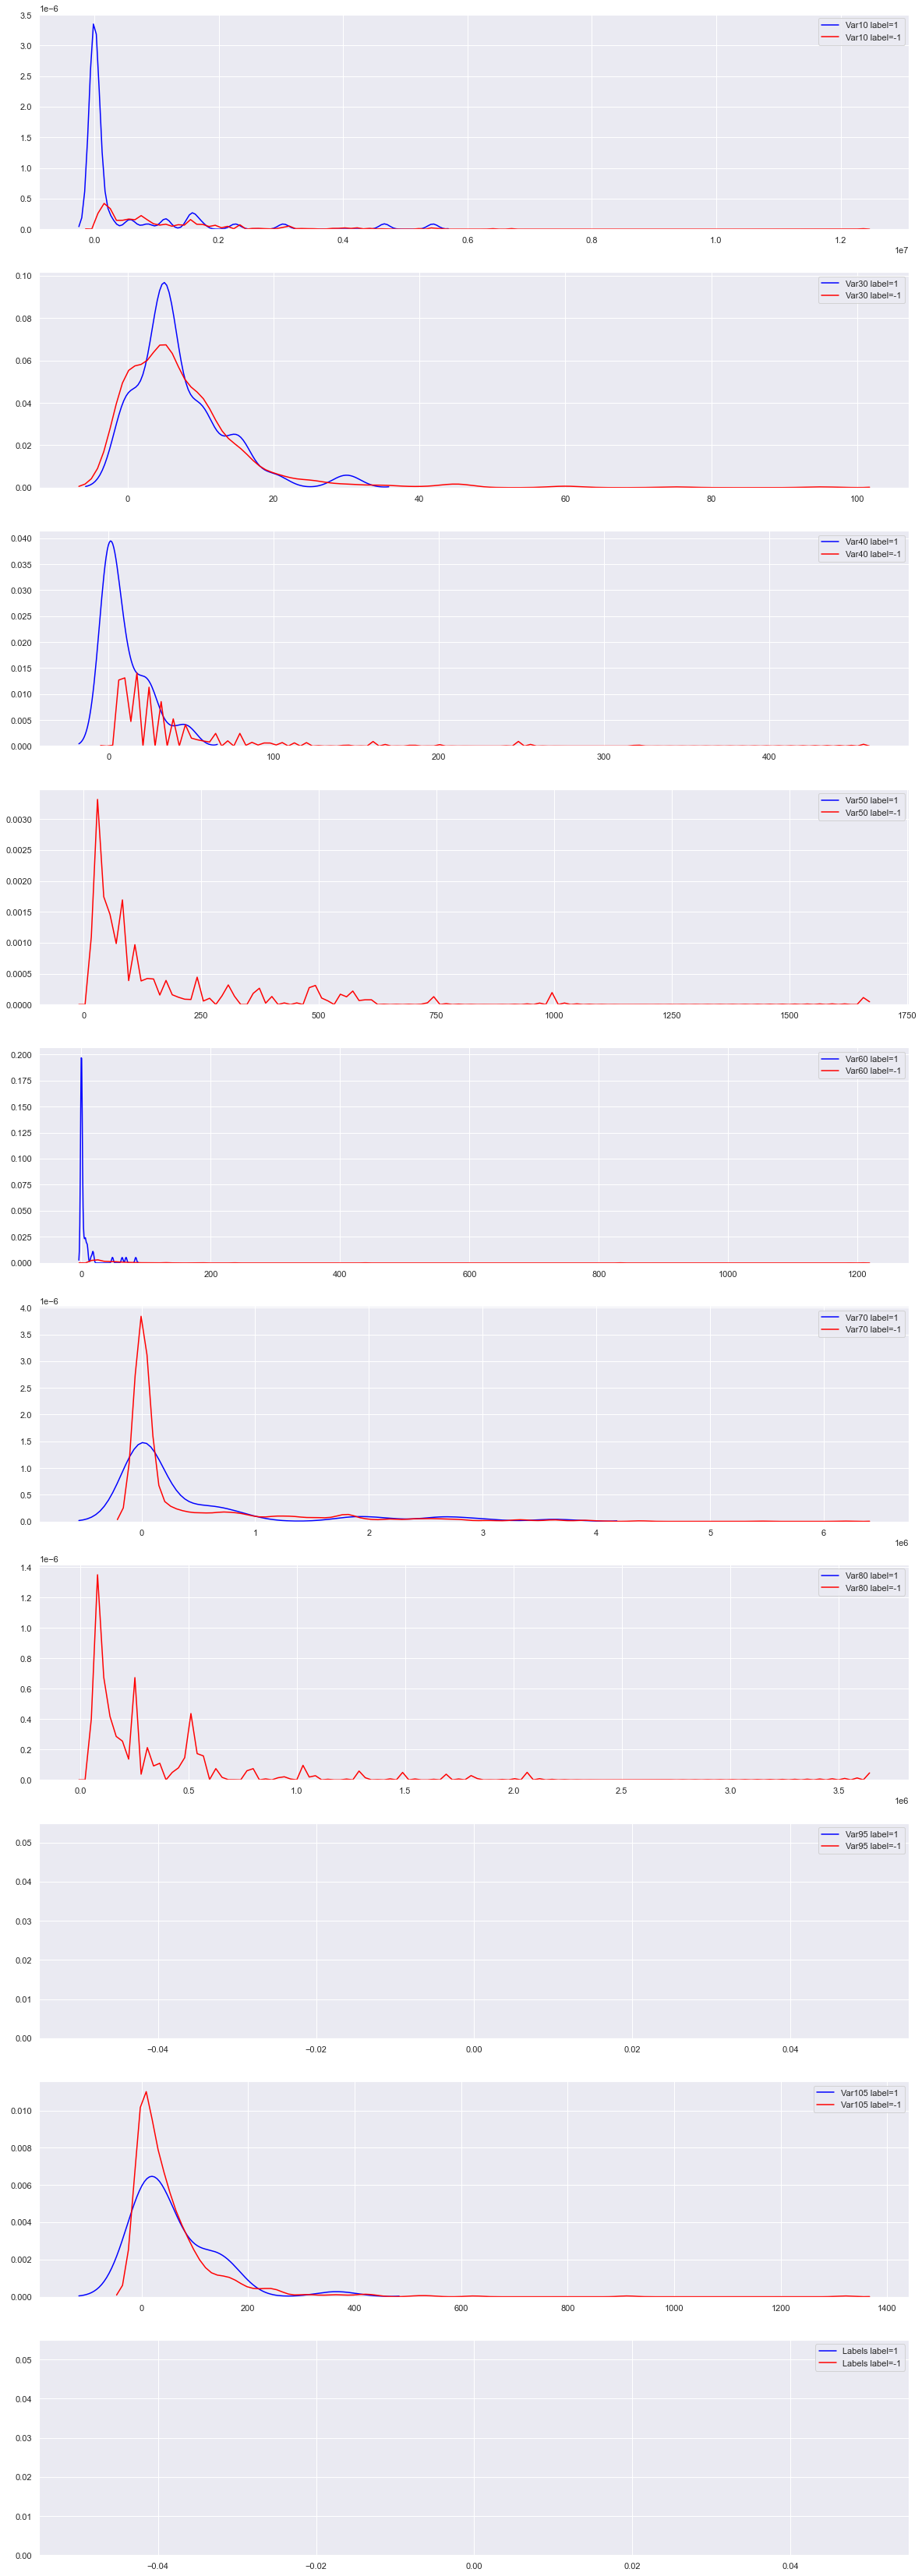

In [30]:
analyze_cols(num_params=10, array_cols=['Var10', 'Var20', 'Var30', 'Var40', 'Var50', 
                                        'Var60', 'Var70', 'Var80', 'Var95', 'Var105'], train_data=train_data)

Var104    0.000711
Var105    0.000711
dtype: float64


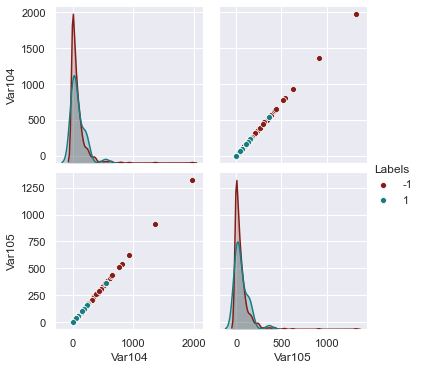

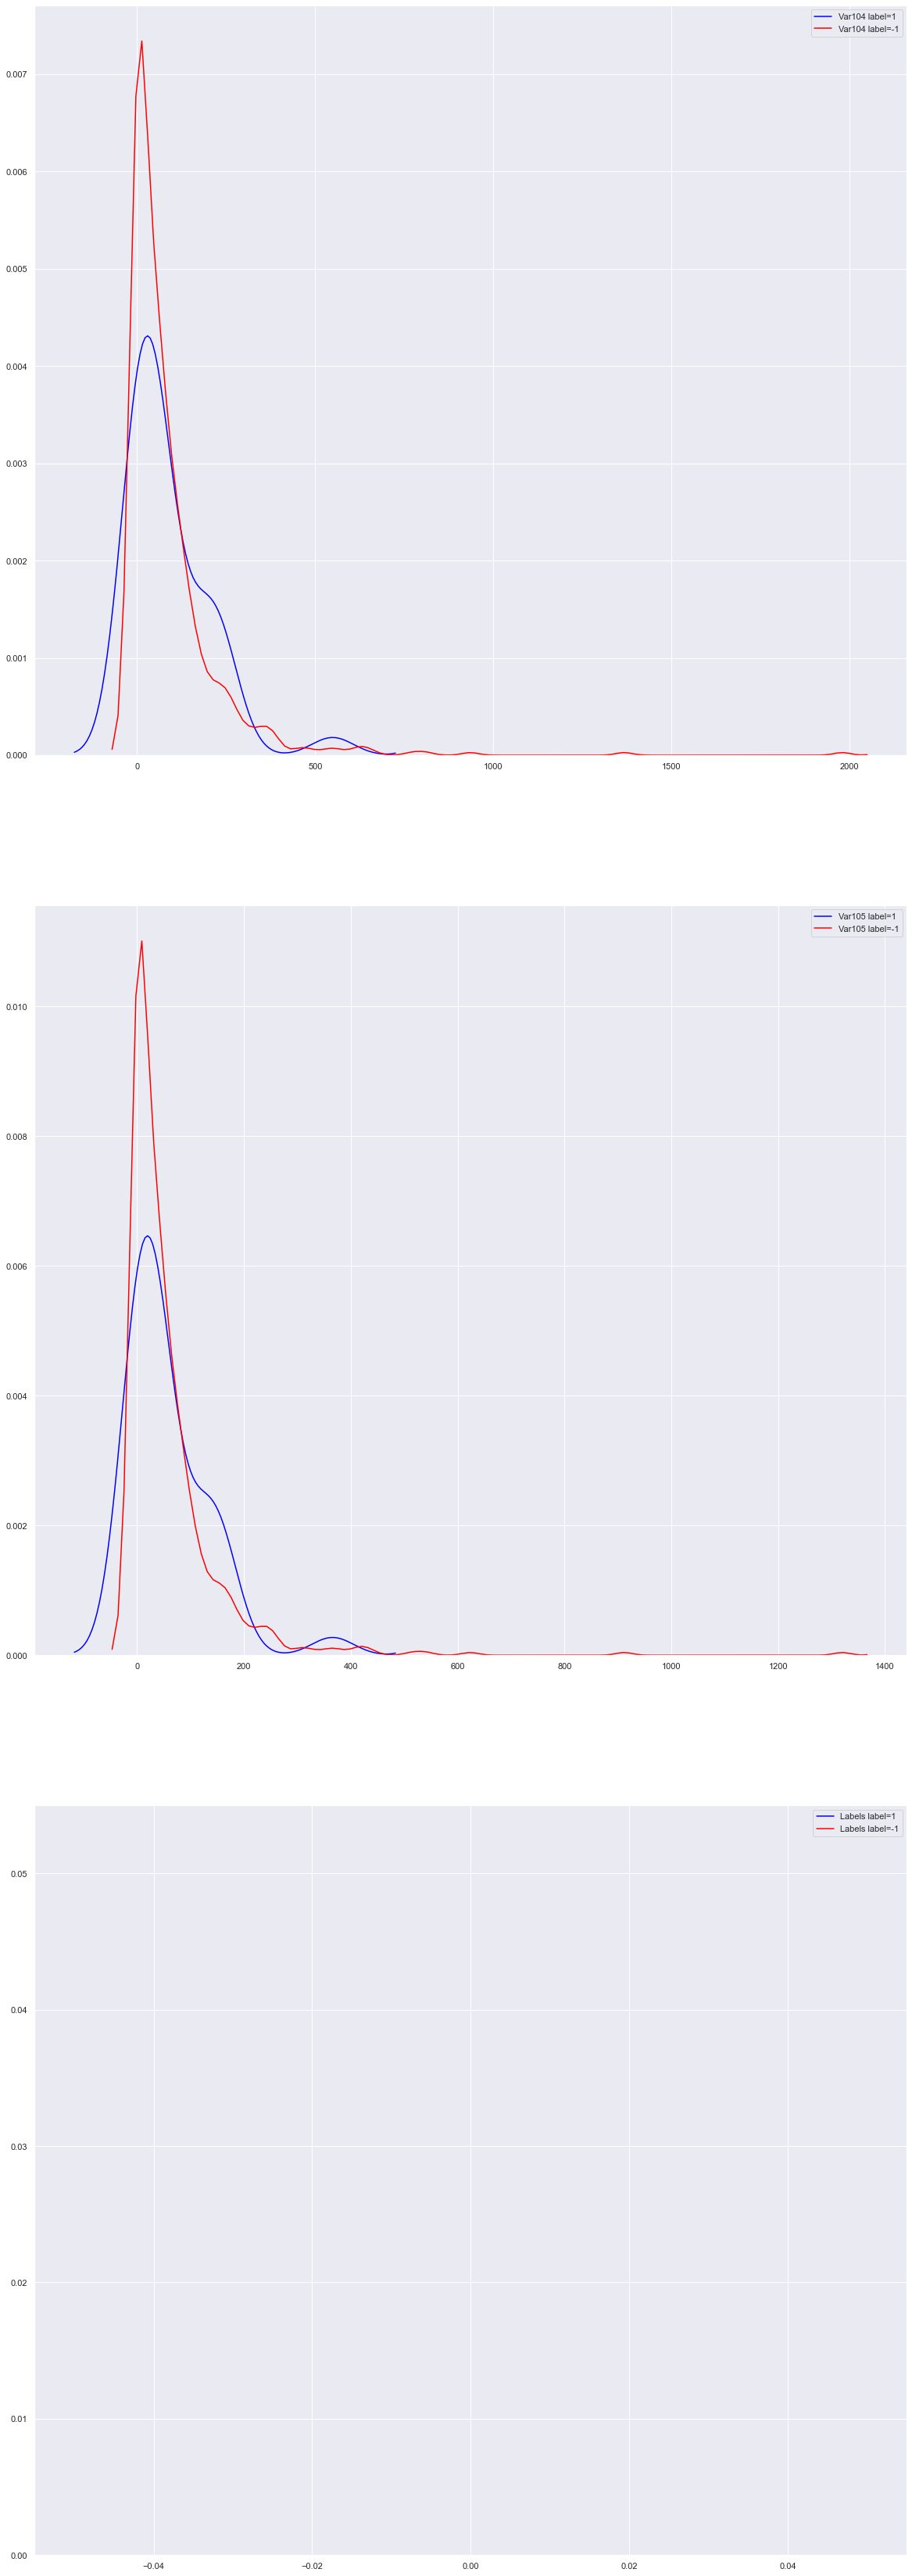

In [43]:
analyze_cols(num_params=3, array_cols=['Var104', 'Var105'], train_data=train_data)

7\. Посмотрим на категориальные переменные: построим и сравним гистограммы значений категориальных переменных для разных классов.

In [32]:
train_data[categorical_].describe()

,Var195,Var217,Var198,Var193,Var218,Var207,Var211,Var200,Var199,Var224,...,Var191,Var206,Var219,Var212,Var192,Var197,Var215,Var213,Var221,Var220
count,40000,39440,40000,40000,39440,40000,40000,19634,39996,662,...,871,35565,35804,40000,39709,39877,563,890,40000,40000
unique,23,12470,3891,50,2,14,2,13297,4400,1,...,1,21,22,78,354,220,1,1,7,3891
top,taul,gvA6,fhk21Ss,RO12,cJvF,me75fM6ugJ,L84s,yP09M03,r83_sZi,4n2X,...,r__I,IYzP,FzaX,NhsEn4L,DHeq9ayfAo,0Xwj,eGzu,KdSa,oslk,4UxGlow
freq,38353,214,3557,28817,20253,28047,32215,51,746,662,...,871,13854,32191,23433,313,3688,563,890,29610,3557


### Посмотрим на распределения категориальных признаков:
Чтобы ускорить реализацию метода - будем отбирать признаки ,в которых может быть не более 10 категорий

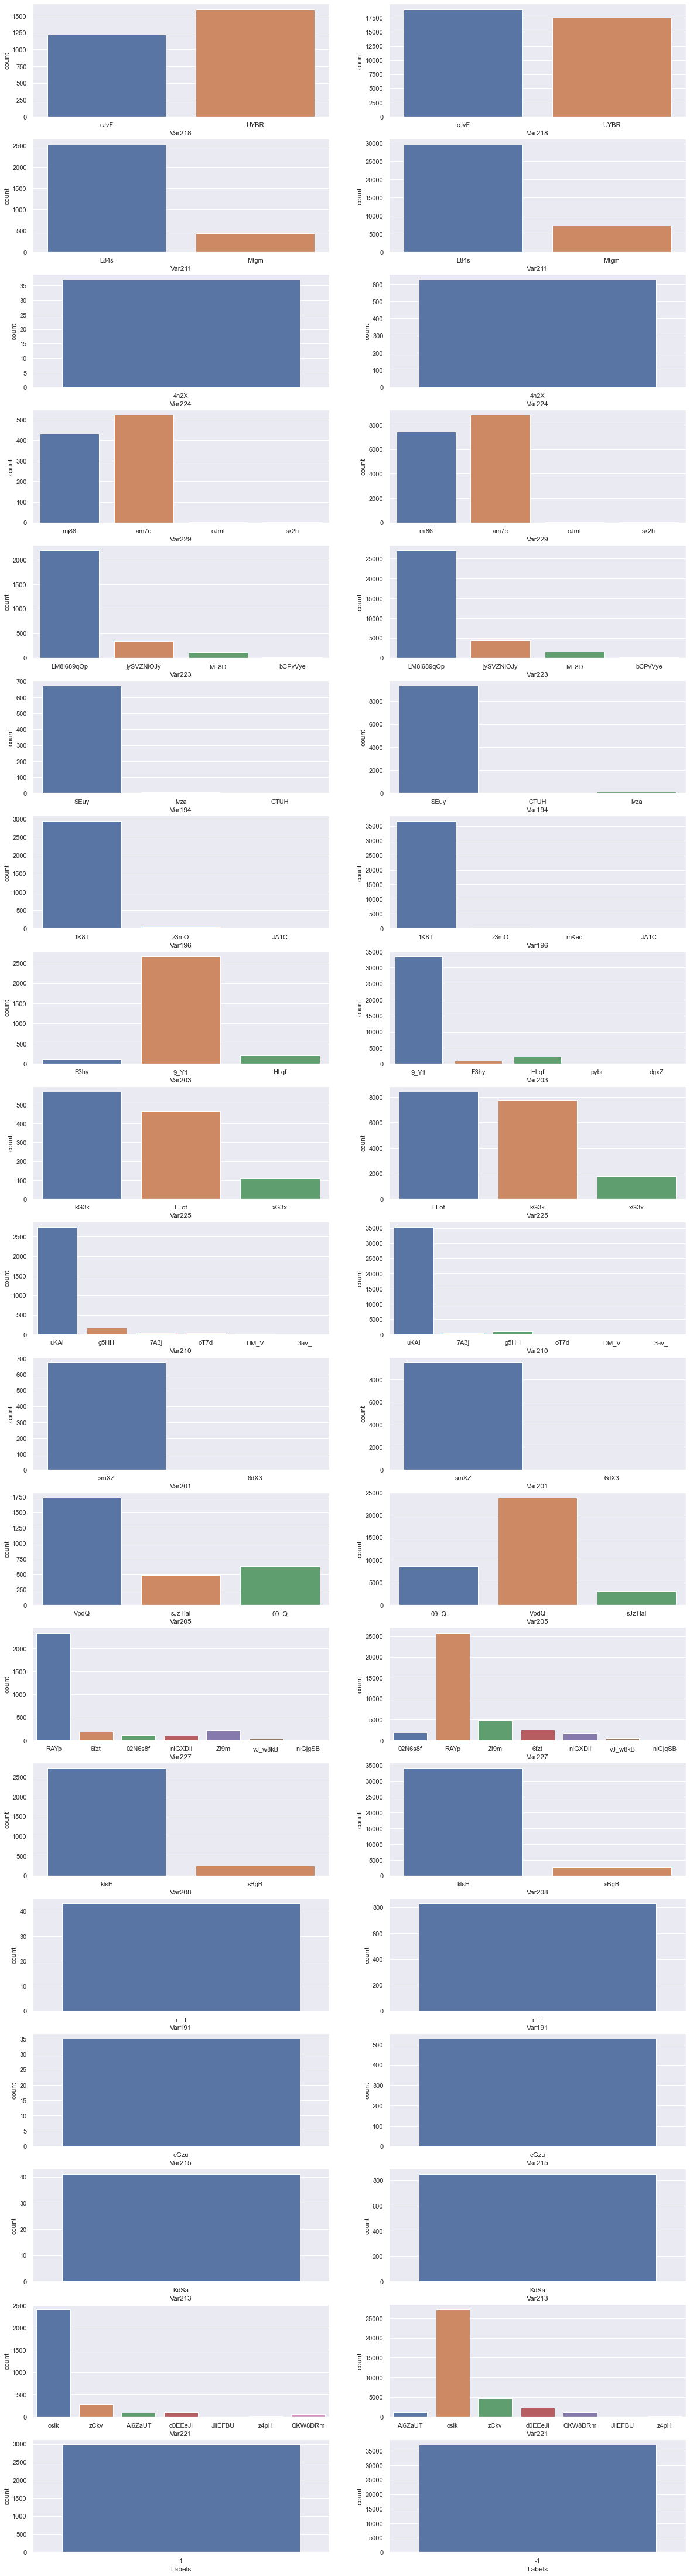

In [60]:
categorical_data=train_data[categorical_]
categorical_data["Labels"]=train_data["Labels"]
large_cols = [ i for i in categorical_data.columns if len(set(categorical_data[i])) < 10 ]
categorical_data=categorical_data[large_cols]


fig, axs = plt.subplots(len(large_cols),2, figsize = (20,80))
for y in range(len(large_cols)):
    sns.countplot(x=categorical_data.iloc[:, y][categorical_data['Labels'] == 1], ax = axs[y,0])
    sns.countplot(x=categorical_data.iloc[:, y][categorical_data['Labels'] == -1], ax = axs[y,1])

8\. Проанализируйте полученные результаты:
1. Наблюдается сильная положиельная корреляция между признаками  var Var168 и var 189. 
2. Var 203 в позитивных сдучаях он принимает 3 значения , в негативных - 5 , уже основываясь на этом признаке ,мы можем с определённой уверенностью классифицировать долю пользователей. Var73 вместе с Var189 достаточно хорошо разделяет людей.
3. Var105 и Var104 скорее всего , один признак можно выразить через другой, скорее всего , болшую часть категориальных признаков нам не дадут полезной информации ,т.к они принимают только одно значение.
4. Отбор признаков будут полезным для построения модели